In [1]:
import os
import numpy as np
import pysindy as ps
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

In [2]:
# Files w/ descriptions
models = [
    ('Barabási–Albert (BA)', '100_Barabasi–Albert_None_(10000,2).npy'),
    ('BA Fitness 0,25', '100_BADFitness_[0.25, 0.75]_(10000,2).npy'),
    ('BA Fitness 0,75', '100_BADFitness_[0.75, 0.25]_(10000,2).npy'),
    ('BA Fitness 0,223', '100_BADFitness_[0.223, 0.991]_(10000,2).npy'),
    ('BA Fitness 0,991', '100_BADFitness_[0.991, 0.223]_(10000,2).npy'),
    ('BA Fitness 0,375', '100_BADFitness_[0.375, 0.625]_(10000,2).npy'),
    ('BA Fitness 0,625', '100_BADFitness_[0.625, 0.375]_(10000,2).npy'),
    ('BA Fitness 0,4375', '100_BADFitness_[0.4375, 0.5625]_(10000,2).npy'),
    ('BA Fitness 0,5625', '100_BADFitness_[0.5625, 0.4375]_(10000,2).npy')
]

In [3]:
# Get File Names
folder_path = os.path.abspath(os.path.join(os.path.abspath(''), '..', 'Data', 'Generated', 'Barabasi'))
models_path = []
for model in models:
    models_path += [model + (os.path.join(folder_path, model[1]),)]
models = models_path

In [4]:
# Load Networks
networks = []
for model in models:
    avg_degrees = np.load(model[2])
    networks += [avg_degrees/100]

In [5]:
n = 10000
m = 2
t = np.arange(1, n - m + 1)

# Get the degree evolution of the initial node
degree_simulations = []
for network in networks:
    degree_simulations += [network[:,0]]

In [6]:
# Custom library + Polynomial
library_functions = [
    lambda x, y : x / y
]
library_function_names = [
    lambda x, y : x + '/' + y,
]
custom_library = ps.CustomLibrary(
    library_functions=library_functions, function_names=library_function_names
)

In [7]:
model = ps.SINDy(
    differentiation_method=ps.FiniteDifference(drop_endpoints=True),
    feature_library=custom_library + ps.PolynomialLibrary(degree=3),
    optimizer=ps.STLSQ(threshold=1e-2, alpha=0.5),
    feature_names=['K', 't']
)

In [8]:
# First column is the degree the second one is the time
X = []
for degree in degree_simulations:
    X += [np.stack((degree, t), axis=-1)]

In [9]:
# Ignore the LinAlgWarning from scikit
import warnings
from scipy.linalg import LinAlgWarning
warnings.filterwarnings(action='ignore')

In [10]:
# Fit SINDy to each network
degree_sindy = []
for idx, x in enumerate(X):
    model.fit(x)
    degree_sindy += [model.simulate([2,1], t=t)[:,0]]
    print(models[idx][0] + ':')
    model.print()

/local/anaconda3/envs/dddu/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.84972e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/local/anaconda3/envs/dddu/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.84972e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/local/anaconda3/envs/dddu/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.63125e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/local/anaconda3/envs/dddu/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.63125e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Barabási–Albert (BA):
K' = 0.490 K/t
t' = 1.000 1
BA Fitness 0,25:
K' = 0.284 K/t
t' = 1.000 1


/local/anaconda3/envs/dddu/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.56094e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/local/anaconda3/envs/dddu/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.56094e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/local/anaconda3/envs/dddu/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.60547e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/local/anaconda3/envs/dddu/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.60547e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


BA Fitness 0,75:
K' = 0.620 K/t
t' = 1.000 1
BA Fitness 0,223:
K' = 0.209 K/t
t' = 1.000 1


/local/anaconda3/envs/dddu/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.76956e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/local/anaconda3/envs/dddu/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.76956e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/local/anaconda3/envs/dddu/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.32229e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/local/anaconda3/envs/dddu/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.32229e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


BA Fitness 0,991:
K' = 0.631 K/t
t' = 1.000 1
BA Fitness 0,375:
K' = 0.357 K/t
t' = 1.000 1


/local/anaconda3/envs/dddu/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.90898e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/local/anaconda3/envs/dddu/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.90898e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/local/anaconda3/envs/dddu/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.50833e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/local/anaconda3/envs/dddu/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.50833e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


BA Fitness 0,625:
K' = 0.583 K/t
t' = 1.000 1
BA Fitness 0,4375:
K' = 0.425 K/t
t' = 1.000 1
BA Fitness 0,5625:
K' = 0.527 K/t
t' = 1.000 1


/local/anaconda3/envs/dddu/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.3813e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/local/anaconda3/envs/dddu/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.3813e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [15]:
names = []
for model in models:
    # names += [model[0] + ' Sim']
    names += [model[0] + ' SINDy']

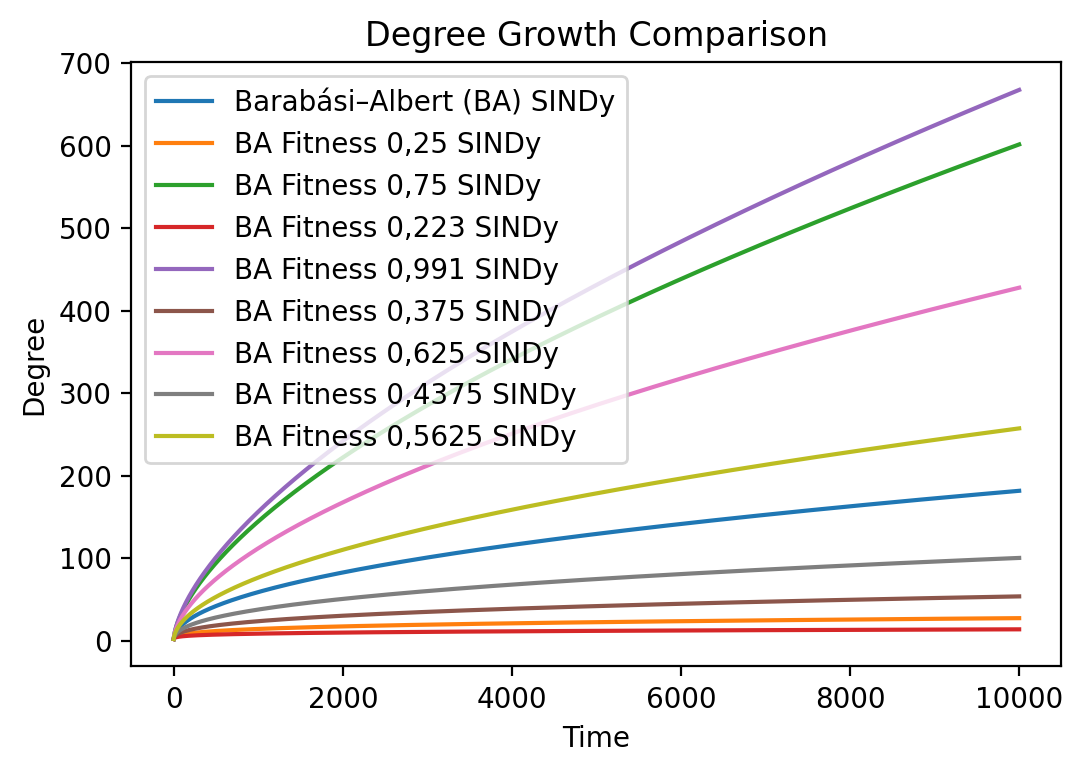

In [16]:
fig = plt.figure(figsize=(6,4), dpi= 200, facecolor='w', edgecolor='k')
for idx, degrees in enumerate(degree_sindy):
    # plt.plot(t, degree_simulations[idx])
    plt.plot(t, degrees)
plt.title('Degree Growth Comparison')
plt.xlabel('Time')
plt.ylabel('Degree')
plt.legend(names)